In [1]:

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [1]:

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
!pip install duckduckgo-search
!pip install fastcore
!pip install itertools
!pip install fastdownload
!pip install fastai
!pip install -Uqq fastai duckduckgo_search
!pip install imports


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [4]:
# from duckduckgo_search import ddg_images
# from fastcore.all import *

# def search_images(term, max_images=30):
#     print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [19]:
from duckduckgo_search import DDGS
from fastcore.all import *

# Using lite backend and limit the number of results
from itertools import islice

ddgs = DDGS()

def search_images(term, max_images = 100):
    print(f"searching for '{term}'")
    keywords = term
    ddgs_images = ddgs.images(keywords)
    limited_images = list(islice(ddgs_images, max_images))
    return L(limited_images).itemgot('image')

bird_search = search_images('bird')
len(bird_search)


searching for 'bird'


100

In [20]:
urls=search_images('bird',max_images=1)
urls[0]

searching for 'bird'


'http://feedinspiration.com/wp-content/uploads/2015/04/Blue-Bird-Of-Paradise.jpg'

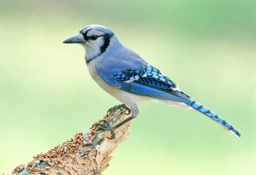

In [21]:
from fastdownload import download_url
dest= 'bird.jpg'
download_url(urls[0], dest, show_progress= True)

from fastai.vision.all import *
im= Image.open(dest)
im.to_thumb(256,256)

searching for 'forest'


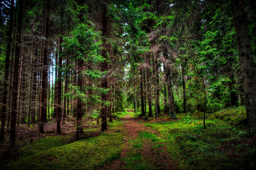

In [22]:
download_url(search_images('forest', max_images=1)[0],'forest.jpg')
Image.open('forest.jpg').to_thumb(256,256)

In [12]:
# !pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [23]:
searches='forest','bird'
path= Path('bird_or_not')
from time import sleep

for o in searches:
    dest= (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls= search_images(f'{o} photo'))
    sleep(10)
    
    download_images(dest,urls=search_images(f'{o} sun photo'))
    sleep(10)
    
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    
    resize_images(path/o, max_size=400, dest= path/o)

searching for 'forest photo'
searching for 'forest sun photo'
searching for 'forest shade photo'
searching for 'bird photo'
searching for 'bird sun photo'
searching for 'bird shade photo'


In [24]:
failed= verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

23

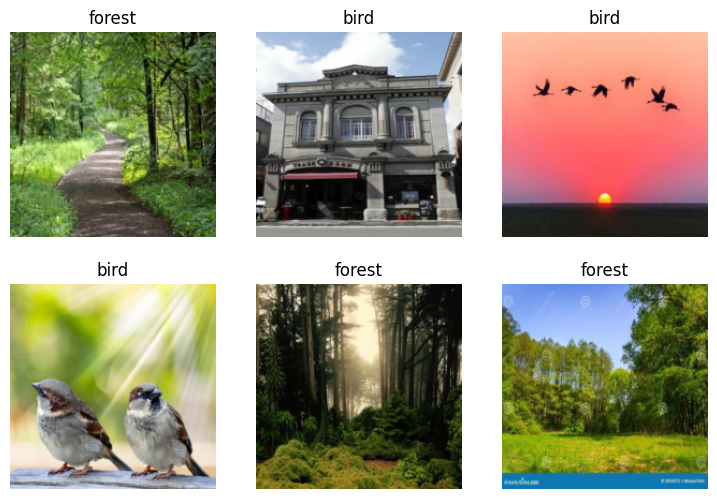

In [25]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [27]:
learn= vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.590102,0.560197,0.095694,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.436729,0.600714,0.124402,00:04
1,0.382335,0.670702,0.148325,00:03
2,0.299780,0.588449,0.153110,00:03


In [28]:
is_bird, _, probs= learn.predict(PILImage.create('bird.jpg'))
print(f"This is a {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a bird.
Probability it's a bird: 1.0000
